### state
distance from avg hsv of orange + blue times number of max
### action
press one key, both, or none (direction of distance determines which keys)
### rewards
score update

$Q[s,a] ← Q[s,a] + α(r+ γ max_{a'} Q[s',a'] - Q[s,a])$

well actually we are going to update q vals when a change in score occurs
therefore Q[s,a] for last state / last action combo += discounted reward + gamma * max over actions Q(current state, actions)

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image

In [30]:
# params
alpha = 0.95
gamma = 0.66
# for exploration
explore_n = 500
explore_rate = 0.004

In [27]:
# save data
Q_vals = np.zeros([100, 3]) # 100 intensities 3 actions
trained_n = 0 # keep track of how many times we've updated Q

In [231]:
def select_action(state):
    return np.argmax(Q_vals[state,:])

def explore(state):
    # with certain probability return random action
    random_test = np.random.random() < (1 / (1 + np.exp(explore_rate * (trained_n - explore_n))))
    if random_test:
        # want to do nothing most often..
        return int(np.floor(np.random.exponential(0.5) % 3))
    else:
        # otherwise just most util
        return select_action(state)

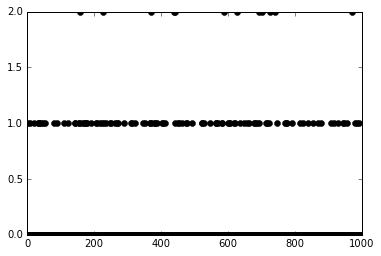

In [242]:
plt.plot([explore(0) for _ in range(1000)], 'ko')

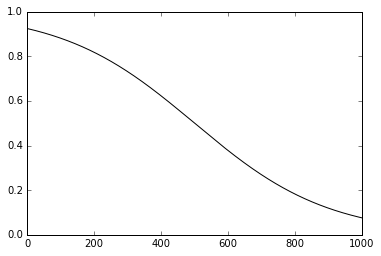

In [26]:
x = np.arange(0, 1000, 0.25)
def f(x):
    return 1 / (1 + np.exp( 0.005 * (x - 500)))

plt.plot(x, f(x), 'k')
plt.show()

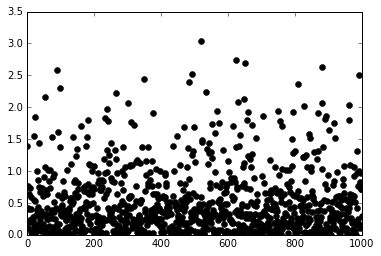

In [182]:
plt.plot(np.random.exponential(0.5, 1000), 'ko')

what needs to be done

q update fun

### train
press any buttons chosen + step
screenshot
### analyze
figure out space (color hist thing)
check if score different
   if yes update q-vals
try new action
